In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from helper_functions import load_data
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_capital_words(text):
    return sum(map(str.isupper, text.split()))

def count_sent(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

def preprocess(sent):
    sent = sent.lower() # lower case
    sent = re.sub('\s+', ' ', sent) # remove double spacing
    sent = re.sub('([0-9]+)', '', sent) # remove numbers
    sent_token_list = [word for word in sent.split(' ')]
    sent = ' '.join(sent_token_list)
    return sent

# Load the data
text_data, labels = load_data('data')
df = pd.DataFrame(list(zip(text_data, labels)), columns=['text', 'label'])

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from helper_functions import load_data

# Load the data
text_data, labels = load_data('data')
df = pd.DataFrame({'text_data': text_data, 'label': labels})

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2)


for idx, row in train_df.iterrows():
    train_df.loc[idx, 'chars'] = count_chars(row['text_data'])
    train_df.loc[idx, 'words'] = count_words(row['text_data'])
    train_df.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    train_df.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    train_df.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    train_df.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])

for idx, row in test_df.iterrows():
    test_df.loc[idx, 'chars'] = count_chars(row['text_data'])
    test_df.loc[idx, 'words'] = count_words(row['text_data'])
    test_df.loc[idx, 'capital_words'] = count_capital_words(row['text_data'])
    test_df.loc[idx, 'sentence_count'] = count_sent(row['text_data'])
    test_df.loc[idx, 'unique_words'] = count_unique_words(row['text_data'])
    test_df.loc[idx, 'stopwords_count'] = count_stopwords(row['text_data'])

# Create a TfidfVectorizer object and fit it on the training data
vectorizer = TfidfVectorizer()
train_tf_idf = vectorizer.fit_transform(train_df['text_data']).toarray()

# Apply the same vectorizer to the test data
test_tf_idf = vectorizer.transform(test_df['text_data']).toarray()


# Combine the tf-idf features with other engineered features
train_X = np.concatenate([train_tf_idf, train_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count']].values], axis=1)
test_X = np.concatenate([test_tf_idf, test_df[['chars', 'words', 'capital_words', 'sentence_count', 'unique_words', 'stopwords_count']].values], axis=1)

# Extract the labels for the training and test sets
train_Y = train_df['label']
test_Y = test_df['label']

# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)

# Predict the labels for the test set
pred_Y = rf.predict(test_X)

# Print the classification report and confusion matrix
print(classification_report(test_Y, pred_Y))
print(confusion_matrix(test_Y, pred_Y))

Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_beautiful_and_damned.txt
Processing file: fitzgerald_flappers_and_philosophers.txt
Processing file: fitzgerald_gatsby.txt
Processing file: fitzgerald_tales_jazz_age.txt
Processing file: fitzgerald_tender_is.txt
Processing file: fitzgerald_the_vegtable.txt
Processing file: fitzgerald_this_side.txt
Processing file: hemingway_across_the_river.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_men_without_women.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_three_stories_ten_poems.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: fitzgerald_all_the_sad.txt
Processing file: fitzgerald_bablyon_revisited.txt
Processing file: fitzgerald_b

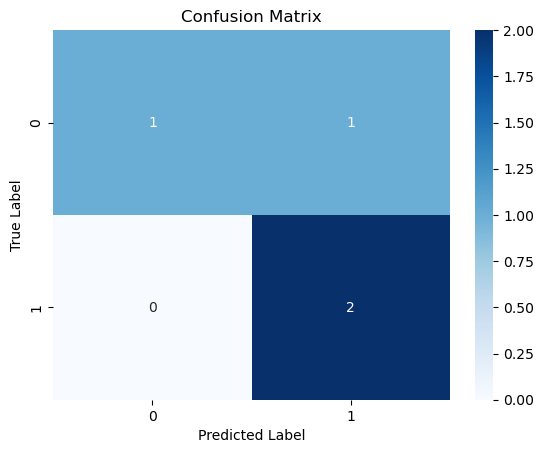

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume cm is the confusion matrix
cm = confusion_matrix(test_Y, pred_Y)

# create a list of class labels
classes = ['0', '1']

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()